

#0. Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#1. Loading dataset
Thêm thuộc tính **as_frame=True** để dữ liệu có được là một DataFrame

In [ ]:
from sklearn import datasets
dataset = datasets.load_iris(as_frame=True)

#2. Splitting dataset

In [ ]:
X=dataset['data']
y=dataset['target']

#3. Xác định mức độ quan trọng của các thuộc tính

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,y)

RandomForestClassifier()

#4. Xuất ra mức độ quan trọng của các thuộc tính, sau đó xếp theo thứ tự giảm dần

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=dataset.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.497070
petal width (cm)     0.387916
sepal length (cm)    0.091648
sepal width (cm)     0.023366
dtype: float64

#5. Biểu diễn mức độ quan trọng của các thuộc tính

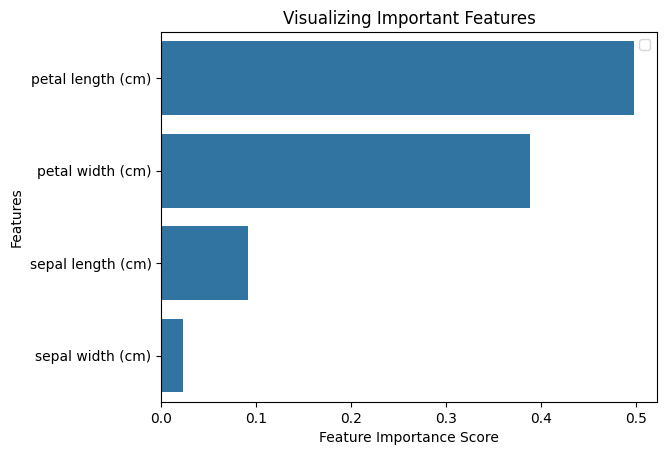

In [ ]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#6. Tạo lại tập dữ liệu mới, chỉ giữ lại 2 thuộc tính quan trọng
Các thuộc tính này lấy từ **index** của **feature_imp** ở #4.

In [ ]:
features = feature_imp.index[0:2].values
X_new = X[feature_imp.index[0:2]]# Lấy 2 thuộc tính với mức độ quan trọng cao nhất
X_new

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


#7. Chia dữ liệu thành tập train/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=1)

#8. Xây dựng mô hình và dự đoán cho tập test

In [ ]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1 measure:", metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9555555555555556
Precision: 0.9558404558404558
Recall: 0.9558404558404558
F1 measure: 0.9558404558404558
